# **Tugas 4 - Graph**

**Nama : Achmad Baharuddin Akbar**

**NIM  : 210411100001**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/tugas-ppw/hasil_preprocesing.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,Tubuh Tak Bisa Bergerak saat Bangun Tengah Mal...,"Minggu, 22 Sep 2024 20:31 WIB","Jakarta - Sleep paralysis, orang awam mengenal...",Kesehatan,Jakarta Sleep paralysis orang awam mengenalny...,jakarta sleep paralysis orang awam mengenalny...,"['jakarta', 'sleep', 'paralysis', 'orang', 'aw...",jakarta sleep paralysis orang awam mengenalnya...
1,Orang Kaya atau Miskin Ternyata Bisa Dilihat d...,"Minggu, 22 Sep 2024 20:01 WIB",Jakarta - Sebuah penelitian dari Universitas T...,Kesehatan,Jakarta Sebuah penelitian dari Universitas To...,jakarta sebuah penelitian dari universitas to...,"['jakarta', 'sebuah', 'penelitian', 'dari', 'u...",jakarta penelitian universitas toronto status ...
2,"Sering Kena Angin Bisa Picu 'Angin Duduk', Mit...","Minggu, 22 Sep 2024 19:00 WIB",Jakarta - Pernah mendengar penyakit 'angin dud...,Kesehatan,Jakarta Pernah mendengar penyakit angin duduk...,jakarta pernah mendengar penyakit angin duduk...,"['jakarta', 'pernah', 'mendengar', 'penyakit',...",jakarta mendengar penyakit angin duduk anggapa...
3,"8 Kepribadian yang Bisa Jadi Tanda Psikopat, S...","Minggu, 22 Sep 2024 18:00 WIB","Jakarta - Berbicara tentang psikopat, mungkin ...",Kesehatan,Jakarta Berbicara tentang psikopat mungkin ya...,jakarta berbicara tentang psikopat mungkin ya...,"['jakarta', 'berbicara', 'tentang', 'psikopat'...",jakarta berbicara psikopat langsung terlintas ...
4,4 Kebiasaan Sehari-hari yang Bisa Memicu Penya...,"Minggu, 22 Sep 2024 17:00 WIB",Jakarta - Penyakit asam urat atau gout merupak...,Kesehatan,Jakarta Penyakit asam urat atau gout merupaka...,jakarta penyakit asam urat atau gout merupaka...,"['jakarta', 'penyakit', 'asam', 'urat', 'atau'...",jakarta penyakit asam urat gout salah jenis ra...


**TF - IDF Weight**

---


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)



Nilai sebelum dan sesudah konversi:
{'Kesehatan': 0, 'Kuliner': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Tubuh Tak Bisa Bergerak saat Bangun Tengah Mal...   
1   Orang Kaya atau Miskin Ternyata Bisa Dilihat d...   
2   Sering Kena Angin Bisa Picu 'Angin Duduk', Mit...   
3   8 Kepribadian yang Bisa Jadi Tanda Psikopat, S...   
4   4 Kebiasaan Sehari-hari yang Bisa Memicu Penya...   
..                                                ...   
95  Potret Denny Cagur Kulineran Seru Bareng Istri...   
96  Potret Nino RAN Makan Kue hingga Kulineran di ...   
97  Banting Setir! Mantan Bodyguard Presiden Ini S...   
98  Inilah Maskapai Penerbangan yang Disebut Punya...   
99  Bikin Tanghulu Pakai Microwave, Bocah-bocah In...   

                          tanggal  \
0   Minggu, 22 Sep 2024 20:31 WIB   
1   Minggu, 22 Sep 2024 20:01 WIB   
2   Minggu, 22 Sep 2024 19:00 WIB   
3   Minggu, 22 Sep 2024 18:00 WIB   
4   Minggu, 22 Sep 2024 17:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df['Filtering/stopword removal']
y = df['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta sleep paralysis orang awam mengenalnya...
1     jakarta penelitian universitas toronto status ...
2     jakarta mendengar penyakit angin duduk anggapa...
3     jakarta berbicara psikopat langsung terlintas ...
4     jakarta penyakit asam urat gout salah jenis ra...
                            ...                        
95    jakarta denny cagur bertemu anaknya sekolah se...
96    jakarta vokalis ran nino dikabarkan menikah sa...
97    jakarta kisah menarik wanita singapura bodygua...
98    jakarta ratusan maskapai dunia beroperasi nega...
99    jakarta tanghulu jajanan populer bocah tanghul...
Name: Filtering/stopword removal, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,abis,absent,abusive,academy,acara,acid,adalina,adiktif,adil,admin,...,youtubeishowspeed,youtuber,youtubers,yuk,zaitun,zaman,zat,zero,zheng,zul
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.054948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,abis,absent,abusive,academy,acara,acid,adalina,adiktif,adil,admin,...,youtubeishowspeed,youtuber,youtubers,yuk,zaitun,zaman,zat,zero,zheng,zul
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

           Node  Degree Centrality
2682        not           0.000489
621     content           0.000489
1077      found           0.000489
2779    pangsit           0.000245
1145       gino           0.000245
...         ...                ...
1370       jaga           0.000000
1371  jagakarsa           0.000000
1372      jagat           0.000000
1373       jago           0.000000
4087        zul           0.000000

[4088 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
filtered_df_train_tfidf_binary


DataFrame setelah menghapus fitur di bawah top 10:


,not,content,found,pangsit,gino,ramadhani,nia,hamil,goreng,pin
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0


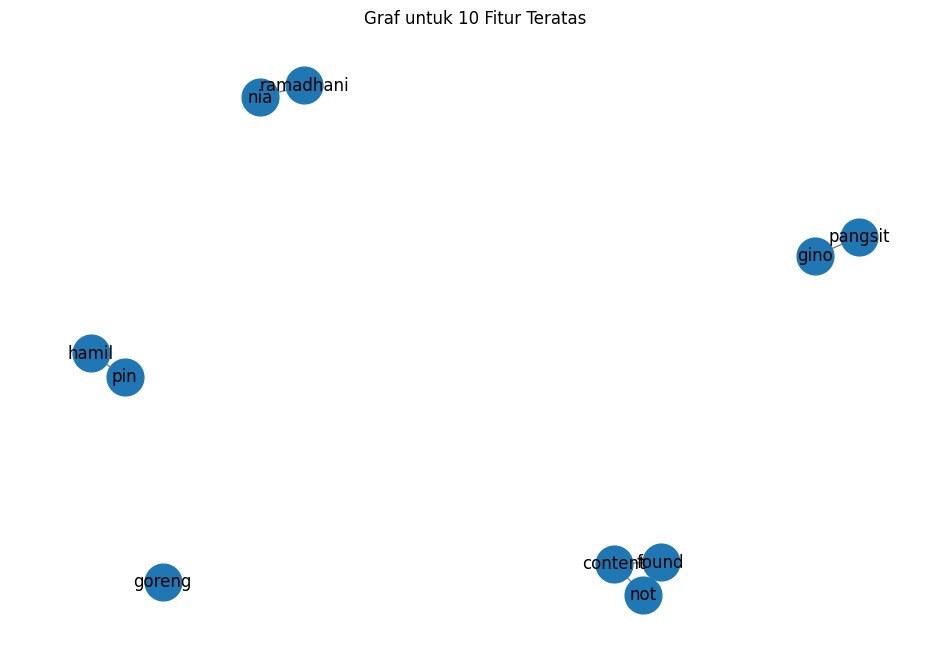

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

        Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0        not           0.000489              0.222222                     0.0
1    content           0.000489              0.222222                     0.0
2      found           0.000489              0.222222                     0.0
3    pangsit           0.000245              0.111111                     0.0
4       gino           0.000245              0.111111                     0.0
5  ramadhani           0.000245              0.111111                     0.0
6        nia           0.000245              0.111111                     0.0
7      hamil           0.000245              0.111111                     0.0
8     goreng           0.000245              0.000000                     0.0
9        pin           0.000245              0.111111                     0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
           not  content  found  pangsit  gino  ramadhani  nia    hamil  \
not        1.0      1.0    1.0      0.0   0.0        0.0  0.0  0.00000   
content    1.0      1.0    1.0      0.0   0.0        0.0  0.0  0.00000   
found      1.0      1.0    1.0      0.0   0.0        0.0  0.0  0.00000   
pangsit    0.0      0.0    0.0      1.0   1.0        0.0  0.0  0.00000   
gino       0.0      0.0    0.0      1.0   1.0        0.0  0.0  0.00000   
ramadhani  0.0      0.0    0.0      0.0   0.0        1.0  1.0  0.00000   
nia        0.0      0.0    0.0      0.0   0.0        1.0  1.0  0.00000   
hamil      0.0      0.0    0.0      0.0   0.0        0.0  0.0  1.00000   
goreng     0.0      0.0    0.0      0.0   0.0        0.0  0.0  0.00000   
pin        0.0      0.0    0.0      0.0   0.0        0.0  0.0  0.57735   

           goreng      pin  
not           0.0  0.00000  
content       0.0  0.00000  
found         0.0  0.00000  
pangsit       0.0  0.00000  


# **Pengujian sample baru**

---


In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
# news_text_1 = """
# jakarta memakai alas kaki menginjak pasir tanah memicu dampak terpapar cacing parasit dialami anak namibia laporan diterbitkan jurnal scientific research anak namanya mengalami gatal parah bermain alas kaki pasir temantemannya menginjak kotoran anjing kucing terinfeksi terkontaminasi larva anak dibawa dokter diperiksa anak lakilaki berusia gatal parah kaki kirinya area terkena berubah warna gelap linier progresif disertai gatal garukan hebat bunyi jurnal keluarga tinggal daerah pinggiran kota padat penduduk rundu wilayah kavango timur namibia bunyi jurnal hasil pemeriksaan anak riwayat gigitan serangga cedera tumbuh normal menerima imunisasi lengkap usianya gizi sesuai usianya mengalami kondisi gatal parah berat badannya kg sistem dasarnya normal jurnal dicek kaki lesi eritematosa bercak kemerahan kulit menjalar diraba permukaan kaki kiri kebagian telapak kakinya lesi muncul berbentuk linier nyeri ditekan edema penumpukan cairan kulit terkena riwayat klinis menyingkirkan reaksi peradangan akibat gigitan serangga jurnal dokter anak terinfeksi cacing parasit cutaneous larva migrans clm kondisi cutaneous larva migrans clm infeksi cacing tambang nematoda menginfeksi anjing kucing kondisi ditemukan negaranegara berpendapatan rendah wilayah tropis subtropis pelancong wilayahwilayah penyakit disebabkan invasi kulit larva parasit cacing tambang masuk bergerak kulit menyebabkan reaksi peradangan hewan rentan terinfestasi membersihkan kaki mengendus kotoran tanah terkontaminasi larva berkembang tahap cacing tambang dewasa usus halus hewanhewan jurnal hewan terinfeksi membuang fesesnya tanah pasir lembap telur cacing menetas larva manusia anakanak terinfeksi berjalan bermain kaki beruang pasirtanah terinfeksi jurnal larva menembus kulit gagal memasuki aliran darah sistem limfatik menggali corium kulit merayap lapisan subkutan menciptakan terowongan lesi linear menonjol pemeriksaan fisik sambung jurnal anak obat pembasmi cacing meredakan seminggu gatal dialami menghilang lesi memudar anak dipantau enam minggu periode lesi sepenuhnya menghilang dipulangkan klinik jurnal sucsuc
# """

# news_text_2 = """
# jakarta viral media sosial penumpang krl pin hamil prediksi lahir hpl netizen menduga menyalahgunakan pin hamil duduk krl netizen menyoroti pengguna krl mengembalikan pin hamil hpl tolong dikaji penggunaan pin hamil disalahgunakan triggered yg orang balikin pinnya pake deposit kek kek pin udah exp knp dipake tulis pengunggah postingan viral terkait postingan manager public relations kai commuter leza arlan pendalaman menindaklanjuti sesuai ketentuan pengguna mendaftarkan dri pin hamil kedaluarsa tercatat sisi pin menandakan batas penggunaan hpl petugas kai commuter mengirimkan email pengguna mengembalikan pin hamil mengembalikan pin batas pengembalian pin hamil batas hpl petugas konfirmasi h hpl pengembalian pin email leza detikcom jumat kai commuter mengimbau pengguna memiliki pin hamil melewati batas hpl mengembalikan pin petugas stasiun menindak pengguna pin hamil melebihi batas hpl tutup leza sucsuc"""

news_text_1 = """
Jakarta  Tak memakai alas kaki saat menginjak pasir atau tanah memang bisa memicu sejumlah dampak termasuk terpapar cacing parasit seperti dialami anak  tahun di Namibia Menurut laporan yang diterbitkan di jurnal Scientific Research anak yang tak disebutkan namanya itu mengalami gatal yang parah selama tiga hari setelah bermain tanpa alas kaki di pasir bersama temantemannya Ia juga sempat menginjak kotoran anjing atau kucing yang terinfeksi dan terkontaminasi oleh larva Anak tersebut kemudian dibawa ke dokter untuk diperiksa lebih lanjut Seorang anak lakilaki berusia  tahun datang dengan rasa gatal yang parah di kaki kirinya selama tiga hari Setelah itu area yang terkena berubah menjadi warna gelap dan linier yang progresif dan disertai rasa gatal dan garukan yang hebat demikian bunyi jurnal tersebut Keluarga tersebut tinggal di daerah pinggiran kota yang padat penduduk di Rundu di wilayah Kavango Timur Namibia bunyi jurnal tersebut Menurut hasil pemeriksaan anak tersebut tidak ada riwayat gigitan serangga atau cedera Ia tumbuh normal dan telah menerima imunisasi lengkap untuk usianya Terlebih dirinya juga mendapatkan gizi yang cukup sesuai usianya dan tak mengalami kondisi lain selain gatal yang parah Berat badannya  kg dan semua sistem pada dasarnya normal kata jurnal Namun setelah dicek pada bagian kaki terdapat lesi eritematosa atau bercak kemerahan pada kulit yang menjalar dan dapat diraba dari permukaan atas kaki kiri kebagian tengah hingga telapak kakinya Lesi yang muncul berbentuk linier dan tak nyeri saat ditekan Selain itu terdapat sedikit edema atau penumpukan cairan pada kulit yang terkena Riwayat klinis menyingkirkan kemungkinan reaksi peradangan akibat gigitan serangga kata jurnal Dokter kemudian mengatakan anak tersebut terinfeksi cacing parasit Cutaneous larva migrans CLM Kondisi Apa Itu Cutaneous larva migrans CLM adalah infeksi cacing tambang nematoda yang biasanya menginfeksi anjing dan kucing Kondisi ini biasanya ditemukan di negaranegara berpendapatan rendah di wilayah tropis dan subtropis serta para pelancong ke wilayahwilayah tersebut Penyakit ini disebabkan oleh invasi kulit oleh larva parasit cacing tambang yang setelah masuk bergerak di bawah kulit dan menyebabkan reaksi peradangan Hewan yang rentan menjadi terinfestasi dengan membersihkan kaki mereka atau dengan mengendus kotoran atau tanah yang terkontaminasi Larva berkembang menjadi tahap cacing tambang dewasa di usus halus hewanhewan ini kata jurnal Ketika hewan yang terinfeksi membuang fesesnya di tanah atau pasir yang lembap telur cacing kemudian menetas menjadi larva Biasanya dalam waktu  hingga  hari Manusia khususnya anakanak akan terinfeksi ketika mereka berjalan atau bermain dengan kaki beruang di pasirtanah yang terinfeksi sebut jurnal Larva setelah menembus kulit gagal memasuki aliran darah atau sistem limfatik Mereka malah menggali di bawah corium kulit dan merayap di lapisan subkutan menciptakan terowongan yang terlihat sebagai lesi linear yang menonjol pada pemeriksaan fisik sambung jurnal Lebih lanjut anak tersebut kemudian diberi obat pembasmi cacing dan meredakan selama tiga hari Setelah seminggu rasa gatal yang dialami menghilang dan lesi mulai memudar Anak tersebut dipantau selama enam minggu dan pada akhir periode ini lesi telah sepenuhnya menghilang dan ia dipulangkan dari klinik kata jurnal sucsuc"""

news_text_2 = """
Jakarta  Belakangan ini viral di media sosial penumpang KRL menggunakan pin ibu hamil lewat dari hari prediksi lahir HPL Tak sedikit netizen yang menduga ibu tersebut menyalahgunakan pin ibu hamil untuk mendapatkan tempat duduk di KRL Netizen juga menyoroti pengguna KRL tersebut tak mengembalikan pin ibu hamil lewat dari masa HPL Tolong dikaji lagi dong penggunaan pin ibu hamil supaya tidak disalahgunakan Harus ada triggered yg buat orang mau balikin pinnya Misal pake deposit kek atau apa kek Ini pin udah exp knp masih dipake terus tulis pengunggah di postingan viral tersebut Terkait postingan tersebut manager Public Relations KAI Commuter Leza Arlan mengatakan pihaknya masih melakukan pendalaman untuk menindaklanjuti hal tersebut Sesuai dengan ketentuan pada saat pengguna mendaftarkan dri untuk mendapatkan pin ibu hamil masa kedaluarsa akan tercatat di bagian sisi belakang pin yang menandakan batas penggunaan setelah HPL Petugas KAI Commuter bakal mengirimkan email kepada pengguna tersebut untuk mengembalikan pin ibu hamil yang sudah diberikan Diberi Satu Bulan untuk Mengembalikan Pin Batas waktu pengembalian pin ibu hamil setelah masa batas HPL adalah satu bulan Petugas akan melakukan konfirmasi H bulan HPL untuk pengembalian pin melalui email tutur Leza kepada detikcom Jumat  pihak KAI Commuter mengimbau kepada pengguna yang memiliki pin ibu hamil dan telah melewati batas HPL untuk mengembalikan pin tersebut kepada petugas di Stasiun Kami akan menindak secara tegas kepada pengguna apabila masih menggunakan pin ibu hamil yang melebihi batas HPL tutup Leza sucsuc"""


# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)

                                                text
0  \nJakarta  Tak memakai alas kaki saat menginja...
1  \nJakarta  Belakangan ini viral di media sosia...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
       Feature     Score
356      yang  0.547061
264       pin  0.493212
63         di  0.388912
112       ibu  0.352294
334  tersebut  0.333611
52        dan  0.323792
102     hamil  0.317065
110       hpl  0.246606
121    jurnal  0.222273
348     untuk  0.210606


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
               yang       pin        di       ibu  tersebut       dan  \
yang      1.000000  0.284867  0.988015  0.284867  0.853370  0.979030   
pin       0.284867  1.000000  0.429416  1.000000  0.742803  0.083616   
di        0.988015  0.429416  1.000000  0.429416  0.923611  0.935850   
ibu       0.284867  1.000000  0.429416  1.000000  0.742803  0.083616   
tersebut  0.853370  0.742803  0.923611  0.742803  1.000000  0.729276   
dan       0.979030  0.083616  0.935850  0.083616  0.729276  1.000000   
hamil     0.284867  1.000000  0.429416  1.000000  0.742803  0.083616   
hpl       0.284867  1.000000  0.429416  1.000000  0.742803  0.083616   
jurnal    0.958567  0.000000  0.903107  0.000000  0.669510  0.996498   
untuk     0.467577  0.980525  0.598419  0.980525  0.859825  0.277694   

             hamil       hpl    jurnal     untuk  
yang      0.284867  0.284867  0.958567  0.467577  
pin       1.000000  1.000000  0.000000  0.980525  
di        0.429416  0.42941

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
           yang  pin  di  ibu  tersebut  dan  hamil  hpl  jurnal  untuk
yang         1    0   1    0         1    1      0    0       1      0
pin          0    1   0    1         1    0      1    1       0      1
di           1    0   1    0         1    1      0    0       1      1
ibu          0    1   0    1         1    0      1    1       0      1
tersebut     1    1   1    1         1    1      1    1       1      1
dan          1    0   1    0         1    1      0    0       1      0
hamil        0    1   0    1         1    0      1    1       0      1
hpl          0    1   0    1         1    0      1    1       0      1
jurnal       1    0   1    0         1    1      0    0       1      0
untuk        0    1   1    1         1    0      1    1       0      1


In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'yang': 6, 'pin': 7, 'di': 7, 'ibu': 7, 'tersebut': 11, 'dan': 6, 'hamil': 7, 'hpl': 7, 'jurnal': 6, 'untuk': 8}

Closeness Centrality:
 {'yang': 0.6428571428571429, 'pin': 0.6923076923076923, 'di': 0.6923076923076923, 'ibu': 0.6923076923076923, 'tersebut': 1.0, 'dan': 0.6428571428571429, 'hamil': 0.6923076923076923, 'hpl': 0.6923076923076923, 'jurnal': 0.6428571428571429, 'untuk': 0.75}

Betweenness Centrality:
 {'yang': 0.0, 'pin': 0.0, 'di': 0.041666666666666664, 'ibu': 0.0, 'tersebut': 0.4305555555555555, 'dan': 0.0, 'hamil': 0.0, 'hpl': 0.0, 'jurnal': 0.0, 'untuk': 0.05555555555555555}


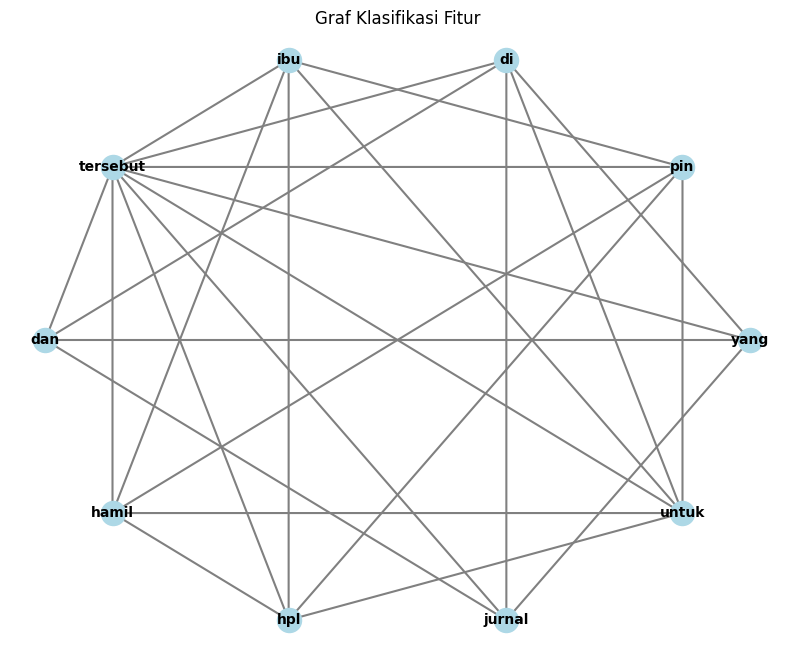

In [ ]:
import matplotlib.pyplot as plt

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Plot setup
plt.figure(figsize=(10, 8))

# Membuat posisi untuk node secara manual dalam sebuah lingkaran
num_features = len(top_10_feature_names)
angles = [2 * i * 3.14159 / num_features for i in range(num_features)]
positions = {top_10_feature_names[i]: (np.cos(angles[i]), np.sin(angles[i])) for i in range(num_features)}

# Plot node
for feature, pos in positions.items():
    plt.scatter(*pos, s=300, color='lightblue', zorder=2)
    plt.text(pos[0], pos[1], feature, fontsize=10, ha='center', va='center', fontweight='bold', zorder=3)

# Plot edges berdasarkan cosine similarity >= 0.5
for i in range(num_features):
    for j in range(i+1, num_features):
        if classification.iloc[i, j] == 1:
            pos1 = positions[top_10_feature_names[i]]
            pos2 = positions[top_10_feature_names[j]]
            plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], color='gray', zorder=1)

# Pengaturan plot
plt.title("Graf Klasifikasi Fitur")
plt.axis('off')  # Menghilangkan sumbu
plt.show()